### Latent Learning

In this module, the agent will first explore the maze for 10 episodes with no task and no rewards. The episode ends if the agent during trial-and-error exploration enters a terminal state.

In [1]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

import utils
from env import Maze
from agent import QAgent, TemporalDifferenceSuccessor
from RL import ReinforcementLearning

%load_ext autoreload
%autoreload 2

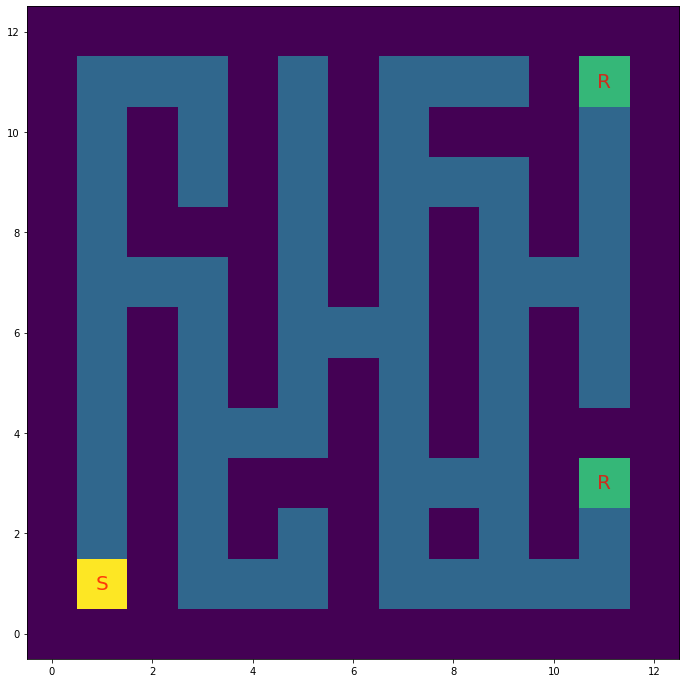

In [7]:
#Load in environment
with open('Environments/maze.pickle', 'rb') as handle:
    env_info = pickle.load(handle)
utils.plot((env_info['height'], env_info['width']), env_info['walls'], env_info['start_state'], env_info['reward_states'])


In [8]:
#Set up agent
agent_info = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.005,
    
}

  0%|          | 0/49 [00:00<?, ?it/s]

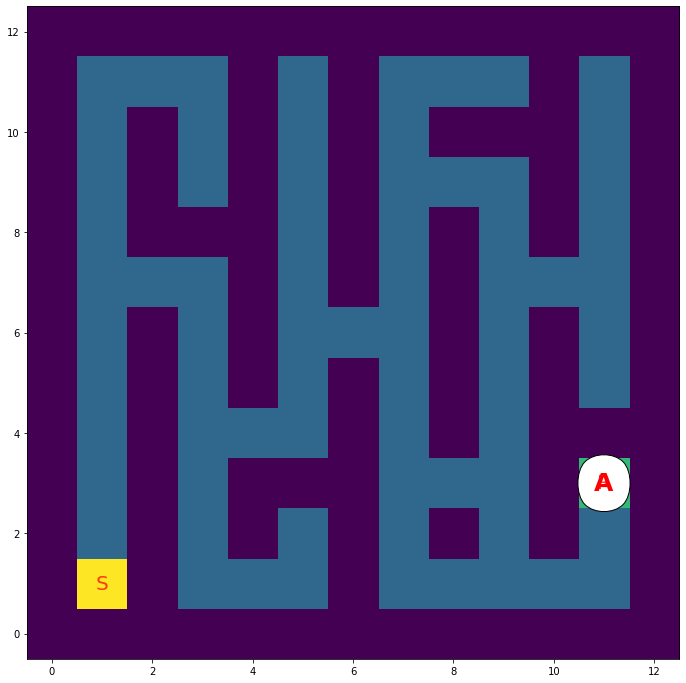

  4%|▍         | 2/49 [00:01<00:23,  2.00it/s]

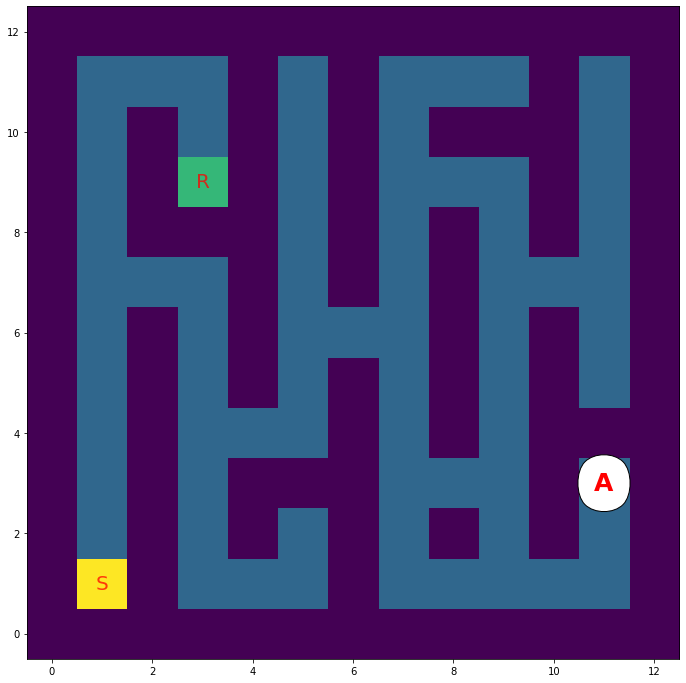

 24%|██▍       | 12/49 [00:09<00:29,  1.27it/s]

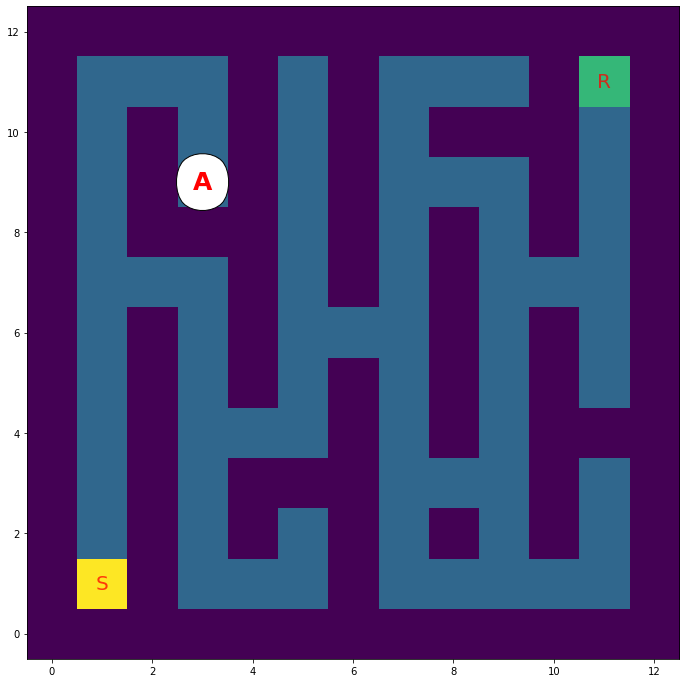

 53%|█████▎    | 26/49 [00:15<00:10,  2.30it/s]

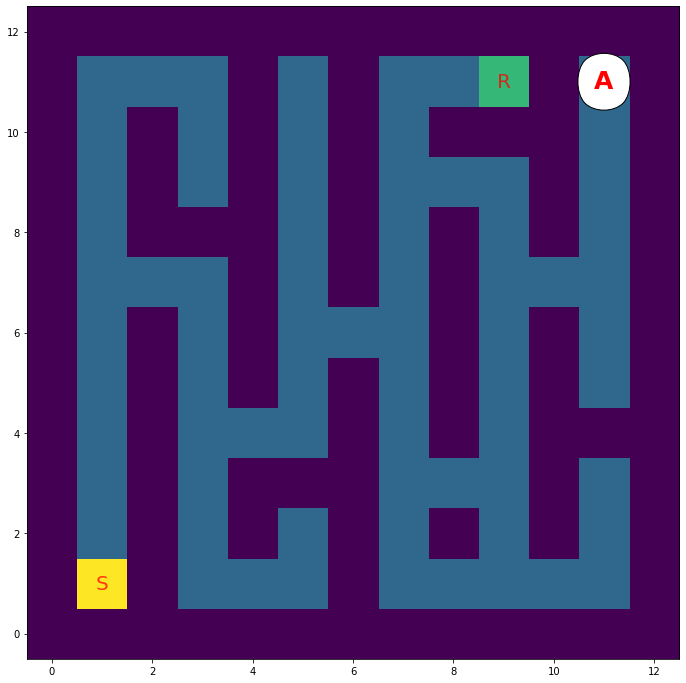

 63%|██████▎   | 31/49 [00:16<00:05,  3.30it/s]

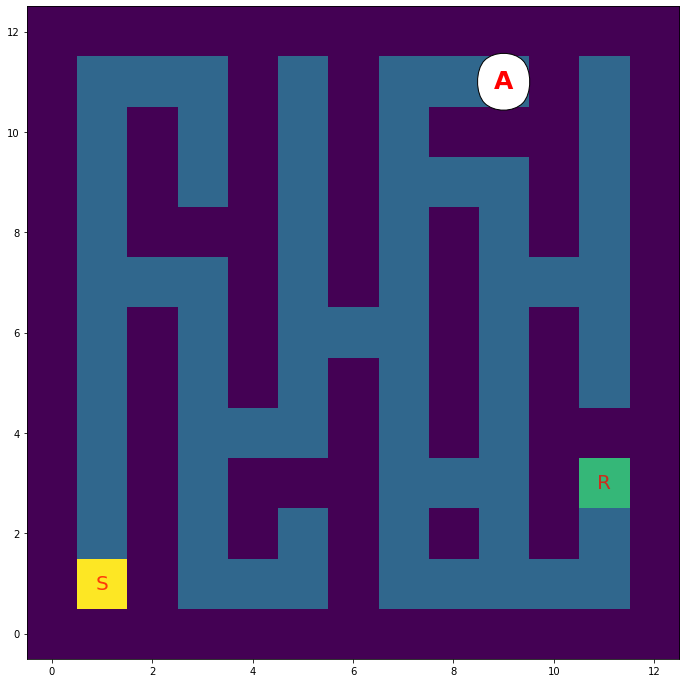

100%|██████████| 49/49 [00:17<00:00,  2.74it/s]


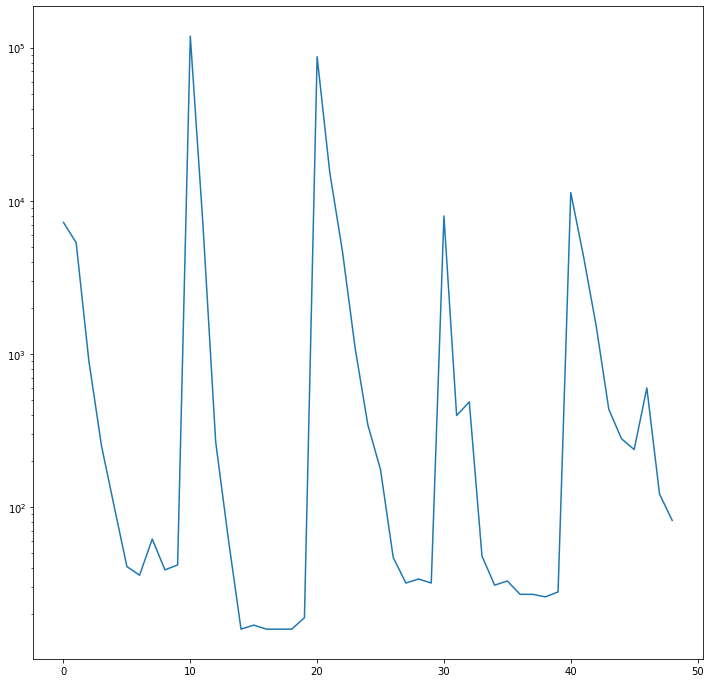

In [12]:
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 49

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9), (3, 11)]

RL.rl_init(env_info, agent_info)


#Latent learning
RL.rl_change_epislon(1) #Random policy
RL.rl_change_task(rewards=[0, 0])
for episode in range(10):
    RL.rl_episode()
    
    
#Task
RL.rl_change_epislon(0.05)
RL.rl_change_task(rewards=[10, 10])
for episode in tqdm(range(NUM_EPISODES)):
    if episode%10==0:
        index = episode//10 -1
        RL.rl_change_task(reward_states=[reward_states[index]])
        RL.rl_plot()
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()

  0%|          | 0/49 [00:00<?, ?it/s]

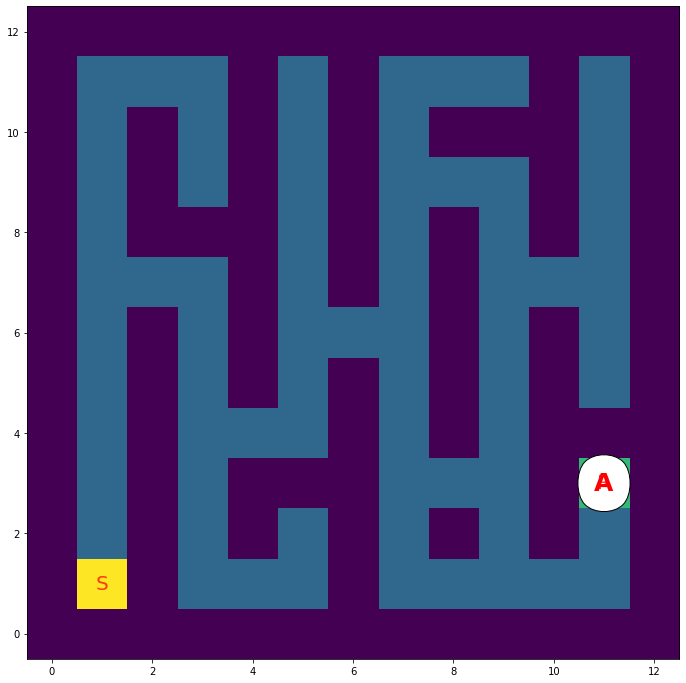

 18%|█▊        | 9/49 [00:01<00:04,  8.94it/s]

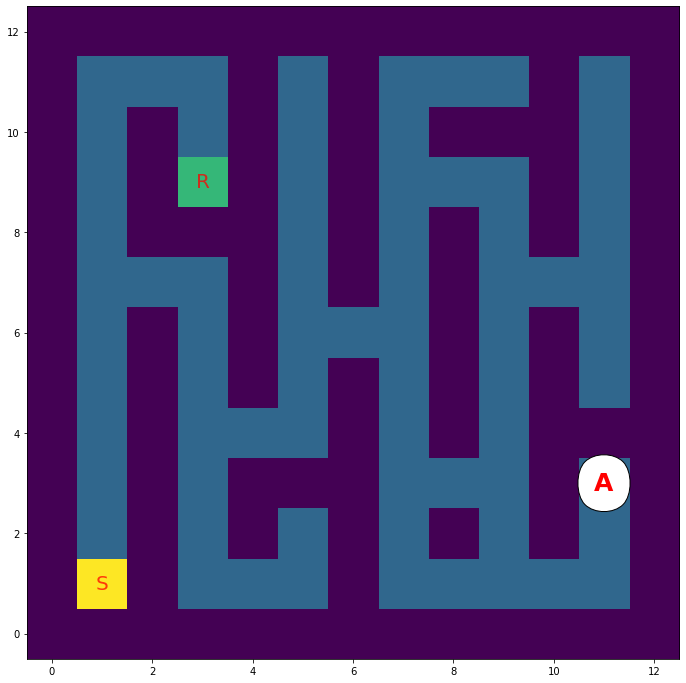

 31%|███       | 15/49 [00:13<00:46,  1.37s/it]

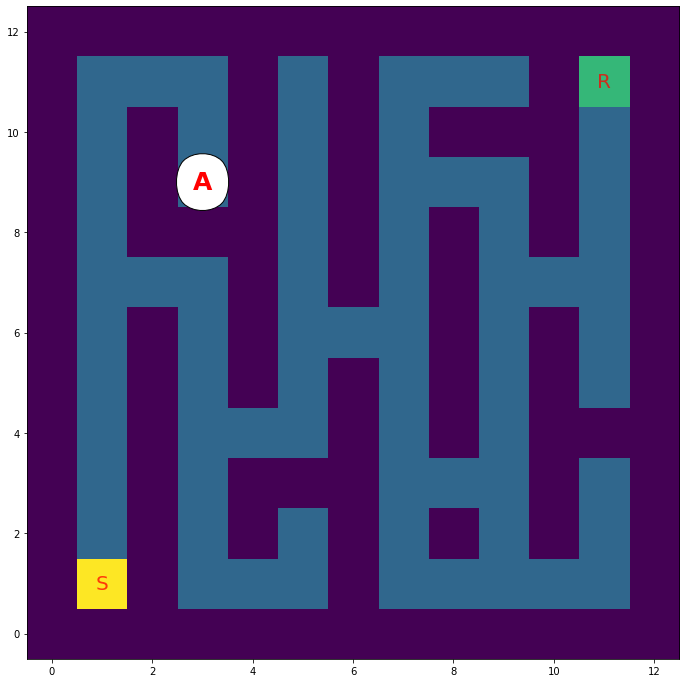

 57%|█████▋    | 28/49 [00:21<00:12,  1.62it/s]

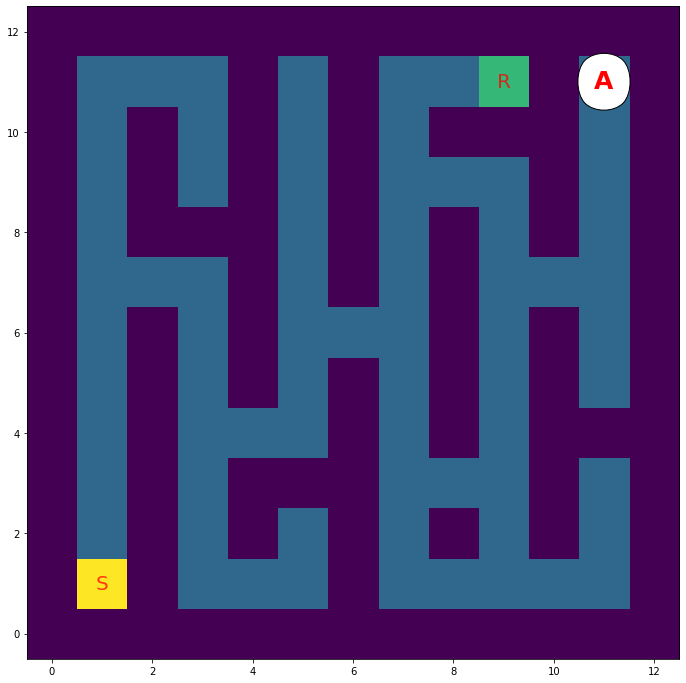

 67%|██████▋   | 33/49 [00:24<00:09,  1.67it/s]

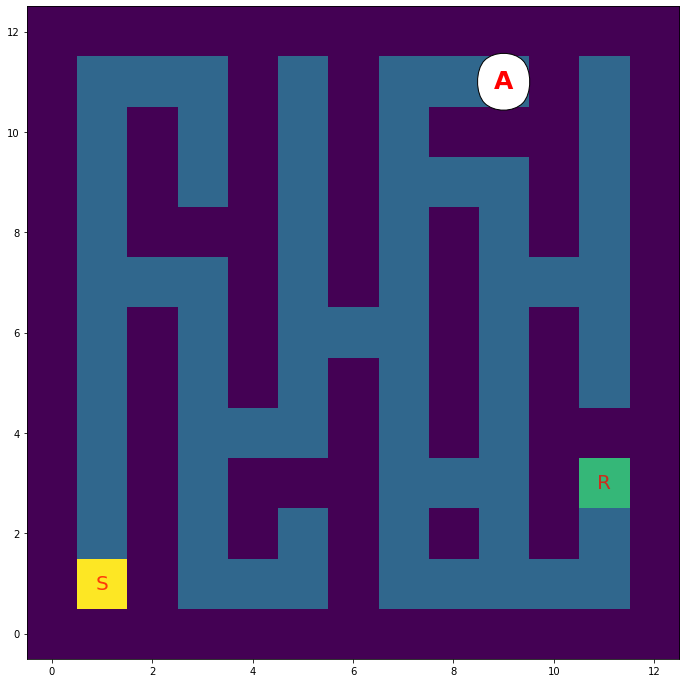

100%|██████████| 49/49 [00:26<00:00,  1.83it/s]


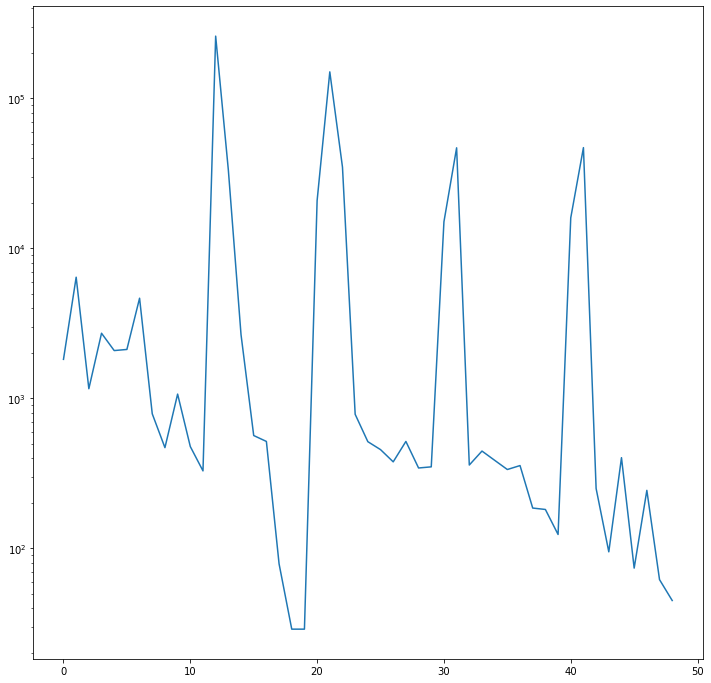

In [15]:
RL = ReinforcementLearning(Maze, QAgent)

NUM_EPISODES = 49

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9), (3, 11)]

RL.rl_init(env_info, agent_info)


#Latent learning
RL.rl_change_epislon(1) #Random policy
RL.rl_change_task(rewards=[0, 0])
for episode in range(10):
    RL.rl_episode()
    
    
#Task
RL.rl_change_epislon(0.05)
RL.rl_change_task(rewards=[10, 10])
for episode in tqdm(range(NUM_EPISODES)):
    if episode%10==0:
        index = episode//10 -1
        RL.rl_change_task(reward_states=[reward_states[index]])
        RL.rl_plot()
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()